In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Classified Data.csv")

In [7]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
df=pd.read_csv("Classified Data.csv",index_col=0)

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [17]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [19]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [29]:
scaled_features[:]

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [25]:
scaled_features.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [35]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [37]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [39]:
from sklearn.model_selection import train_test_split

In [41]:
df['TARGET CLASS']

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn=KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
pred=knn.predict(x_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], d

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(confusion_matrix(y_test,pred))

[[128  15]
 [ 12 145]]


In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       143
           1       0.91      0.92      0.91       157

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [77]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
error_rate

[0.09,
 0.1,
 0.06333333333333334,
 0.07666666666666666,
 0.056666666666666664,
 0.06,
 0.06,
 0.05333333333333334,
 0.06333333333333334,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.06,
 0.05,
 0.05333333333333334,
 0.05,
 0.056666666666666664,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.06,
 0.05333333333333334,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.043333333333333335,
 0.043333333333333335,
 0.04666666666666667,
 0.04666666666666667]

Text(0, 0.5, 'Error Rate')

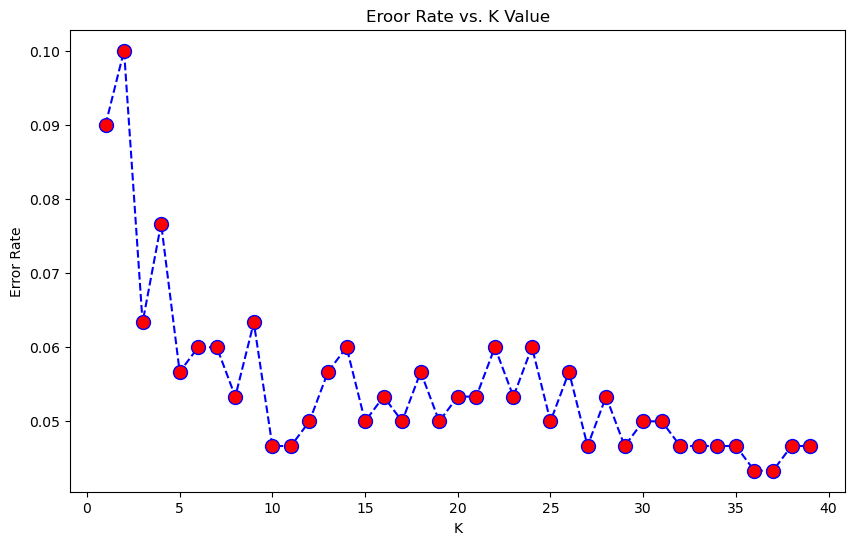

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Eroor Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [83]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[134   9]
 [  5 152]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       143
           1       0.94      0.97      0.96       157

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [85]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[133  10]
 [  4 153]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       143
           1       0.94      0.97      0.96       157

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [87]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[132  11]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       143
           1       0.93      0.98      0.96       157

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [89]:
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=29')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=29


[[132  11]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       143
           1       0.93      0.98      0.96       157

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [91]:
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=32')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=32


[[132  11]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       143
           1       0.93      0.98      0.96       157

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [93]:
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=33')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=33


[[132  11]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       143
           1       0.93      0.98      0.96       157

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [97]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=34


[[132  11]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       143
           1       0.93      0.98      0.96       157

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [99]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=35


[[132  11]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       143
           1       0.93      0.98      0.96       157

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [101]:
knn=KNeighborsClassifier(n_neighbors=36)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=36')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=36


[[133  10]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.93      0.95       143
           1       0.94      0.98      0.96       157

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [103]:
knn=KNeighborsClassifier(n_neighbors=37)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=37')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=37


[[133  10]
 [  3 154]]


              precision    recall  f1-score   support

           0       0.98      0.93      0.95       143
           1       0.94      0.98      0.96       157

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [105]:
knn=KNeighborsClassifier(n_neighbors=38)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=38')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=38


[[133  10]
 [  4 153]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       143
           1       0.94      0.97      0.96       157

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [107]:
knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('WITH K=39')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=39


[[133  10]
 [  4 153]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       143
           1       0.94      0.97      0.96       157

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

